<a href="https://colab.research.google.com/github/AlexxxisDxlgxdx/M-todos-numericos/blob/main/newton_diferencias_divididas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Valor interpolado en x = 1980: 4472888287.25
Error absoluto en el punto (1980, 4452584592): 20303695.25


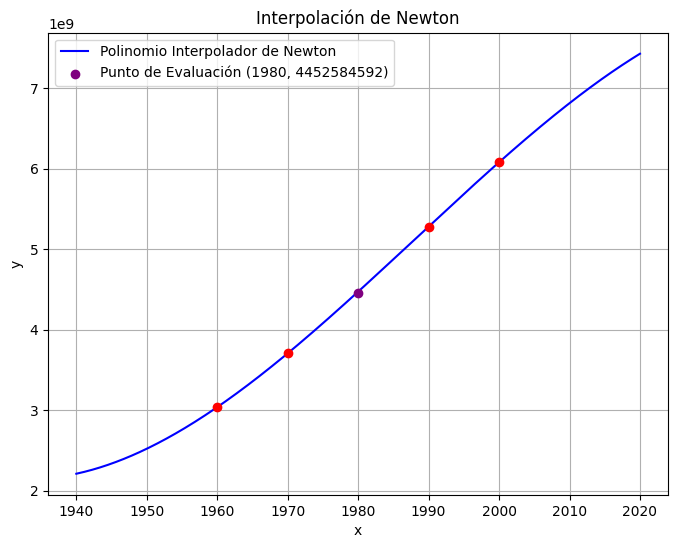

In [ ]:
#Metodo de Newton

import numpy as np
from sympy import Symbol, lambdify, expand
import matplotlib.pyplot as plt

def newton_divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])

    return coef[0, :]

def newton_poly(coef, x_data, t):
    n = len(coef)
    poly = coef[0]
    for i in range(1, n):
        term = coef[i]
        for j in range(i):
            term *= (t - x_data[j])
        poly += term
    return poly

def plot_newton_interpolation(x, y, x_eval, y_real):
    # Calcula los coeficientes de diferencias divididas
    coef = newton_divided_diff(x, y)
    # Genera el polinomio simbólico
    t = Symbol('t')
    p = newton_poly(coef, x, t)
    p = expand(p)

    # Evaluación del polinomio en el punto x_eval
    p_func = lambdify(t, p, modules=['numpy'])
    y_eval = p_func(x_eval)

    # Calcular el error absoluto
    error_abs = abs(y_real - y_eval)

    # Imprimir el error
    print(f"Valor interpolado en x = {x_eval}: {y_eval}")
    print(f"Error absoluto en el punto ({x_eval}, {y_real}): {error_abs}")

    # Crear un conjunto de valores para x para graficar
    x_vals = np.linspace(min(x) - 20, max(x) + 20, 500)
    # Evaluar la función en el conjunto de valores
    y_vals = p_func(x_vals)

    # Crear la figura
    plt.figure(figsize=(8, 6))
    # Graficar el polinomio
    plt.plot(x_vals, y_vals, label='Polinomio Interpolador de Newton', color='blue')

    # Graficar los puntos originales
    plt.scatter(x, y, color='red', zorder=5)
    # Marcar el punto de evaluación
    plt.scatter([x_eval], [y_real], color='purple', zorder=6, label=f'Punto de Evaluación ({x_eval}, {y_real})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Interpolación de Newton')
    plt.grid()
    plt.legend()
    plt.show()

# Datos
x = [1960, 1970, 1990, 2000]
y = [3039585530, 3707475887, 5281653820, 6079603571]

# Punto a evaluar
x_eval = 1980
y_real = 4452584592

# Llamar a la función con el cálculo del error
plot_newton_interpolation(x, y, x_eval, y_real)

In [ ]:
#METODO NEWTON(DIFERENCIAS DIVIDIDAS)
#CODIGO GRAFICA POLINOMIO INTERPOLADOR Y CALCULA ERROR
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

# Función para calcular las diferencias divididas de Newton
def newton_diferencias_divididas(x, y):
    n = len(x)
    coef = np.zeros([n, n])
    coef[:, 0] = y  # La primera columna son los valores de y

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])

    return coef[0, :]

# Función para construir el polinomio de Newton
def newton_interpolacion(x, y, u=None):
    n = len(x)
    t = Symbol('t')
    coef = newton_diferencias_divididas(x, y)

    p = coef[0]
    for i in range(1, n):
        term = coef[i]
        for j in range(i):
            term *= (t - x[j])
        p += term

    p = expand(p)

    if u == None:
        return p
    else:
        r = p.subs(t, u)
        return r

# Función para graficar e interpolar usando diferencias divididas de Newton
def plot_newton_interpolation(x, y, x_eval, y_real):
    # Construir el polinomio de Newton
    p = newton_interpolacion(x, y)

    # Evaluar el polinomio en el punto x_eval
    y_eval = newton_interpolacion(x, y, x_eval)

    # Convertimos el polinomio en una función que pueda evaluar un conjunto de valores
    p_func = lambdify(Symbol('t'), p, modules=['numpy'])

    # Calcular el error absoluto
    error_abs = abs(y_real - y_eval)

    # Imprimir el error
    print(f"El polinomio interpolador es: {p}")
    print(f"Valor interpolado en x = {x_eval}: {y_eval}")
    print(f"Error absoluto en el punto ({x_eval}, {y_real}): {error_abs}")

    # Creamos un conjunto de valores para x y poder graficar
    x_vals = np.linspace(min(x) - 20, max(x) + 20, 500)
    # Evaluamos la función en el conjunto de valores
    y_vals = p_func(x_vals)

    # Creamos la figura
    plt.figure(figsize=(8, 6))
    # Creamos la gráfica
    plt.plot(x_vals, y_vals, label='Polinomio Interpolador de Newton', color='blue')

    # Graficamos los puntos originales
    plt.scatter(x, y, color='red', zorder=5)
    # Marcamos el punto de evaluación
    plt.scatter([x_eval], [y_real], color='purple', zorder=6, label=f'Punto de Evaluación ({x_eval}, {y_real})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Interpolación de Newton')
    plt.grid()
    plt.legend()
    plt.show()


El polinomio interpolador es: -9028.15208333335*t**3 + 53843989.0316667*t**2 - 106960682571.042*t + 70776705285654.4
Valor interpolado en x = 1980: 4472888287.81250
Error absoluto en el punto (1980, 4452584592): 20303695.8125000


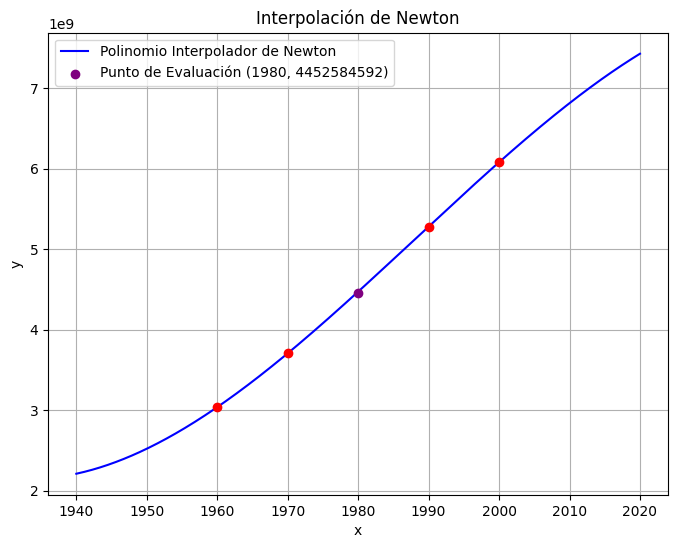

In [ ]:
# Datos
x = [1960, 1970, 1990, 2000]
y = [3039585530, 3707475887, 5281653820, 6079603571]

# Punto a evaluar
x_eval = 1980
y_real = 4452584592

# Llamamos a la función con el cálculo del error y la gráfica
plot_newton_interpolation(x, y, x_eval, y_real)

In [ ]:
#CALCULAMOS EJERCICIO 3 a) b)(codigo solo calcula polinomio y valores evaluados en un punto)
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

# Función para calcular las diferencias divididas de Newton
def newton_diferencias_divididas(x, y):
    n = len(x)
    coef = np.zeros([n, n])
    coef[:, 0] = y  # La primera columna son los valores de y

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])

    return coef[0, :]

# Función para construir el polinomio de Newton
def newton_interpolacion(x, y, u=None):
    n = len(x)
    t = Symbol('t')
    coef = newton_diferencias_divididas(x, y)

    p = coef[0]
    for i in range(1, n):
        term = coef[i]
        for j in range(i):
            term *= (t - x[j])
        p += term

    p = expand(p)

    if u == None:
        return p
    else:
        r = p.subs(t, u)
        return r



In [ ]:
# Datos
x = [0.6, 0.7, 0.8, 0.9, 1.0]
y = [1.433329, 1.632316, 1.896481, 2.247908, 2.718282]

p = newton_interpolacion(x, y)
p_1 = newton_interpolacion(x, y, 0.82)
p_2 = newton_interpolacion(x, y, 0.98)

print(f"El polinomio interpolador es: {p}")
print(f"calculamos P_4 evaluado en 0.82: {p_1}")
print(f"calculamos P_4 evaluado en 0.98: {p_2}")


El polinomio interpolador es: 4.00041666666668*t**4 - 8.32058333333333*t**3 + 8.93089583333326*t**2 - 3.47361416666659*t + 1.58116699999998
calculamos P_4 evaluado en 0.82: 1.95890977440000
calculamos P_4 evaluado en 0.98: 2.61284796640000


In [ ]:
x = [0.6, 0.7, 0.8, 0.9, 1.0]

def fun_1(x):
  return np.exp(x**2)

for valor in x:
    y = fun_1(valor)
    print(y)

1.4333294145603401
1.632316219955379
1.8964808793049517
2.2479079866764717
2.718281828459045


In [32]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

# Función para calcular las diferencias divididas de Newton
def newton_diferencias_divididas(x, y):
    n = len(x)
    coef = np.zeros([n, n])
    coef[:, 0] = y  # La primera columna son los valores de y

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])

    return coef[0, :]

# Función para construir el polinomio de Newton
def newton_interpolacion(x, y, u=None):
    n = len(x)
    t = Symbol('t')
    coef = newton_diferencias_divididas(x, y)

    p = coef[0]
    for i in range(1, n):
        term = coef[i]
        for j in range(i):
            term *= (t - x[j])
        p += term

    p = expand(p)

    if u == None:
        return p
    else:
        r = p.subs(t, u)
        return r

# Función para graficar e interpolar usando diferencias divididas de Newton
def plot_newton_interpolation(x, func, x_eval, y_real):
    # Calcula los valores de y usando la función dada
    y = [func(xi) for xi in x]

    # Construir el polinomio de Newton
    p = newton_interpolacion(x, y)

    # Evaluar el polinomio en el punto x_eval
    y_eval = newton_interpolacion(x, y, x_eval)

    # Convertimos el polinomio en una función que pueda evaluar un conjunto de valores
    p_func = lambdify(Symbol('t'), p, modules=['numpy'])

    # Calcular el error absoluto
    error_abs = abs(y_real - y_eval)

    # Imprimir el error
    print(f"El polinomio interpolador es: {p}")
    print(f"Valor interpolado en x = {x_eval}: {y_eval}")
    print(f"Error absoluto en el punto ({x_eval}, {y_real}): {error_abs}")

    # Creamos un conjunto de valores para x y poder graficar
    x_vals = np.linspace(min(x) - 0.5, max(x) + 0.5, 500)
    # Evaluamos la función en el conjunto de valores
    y_vals = p_func(x_vals)

    # Evaluamos la función original en el conjunto de valores
    y_func_vals = [func(xi) for xi in x_vals]

    # Evaluamos el error en el conjunto de valores
    error_vals = np.abs(np.array(y_func_vals) - np.array(y_vals))

    # Creamos la figura
    plt.figure(figsize=(10, 8))

    # Graficamos la función original
    plt.plot(x_vals, y_func_vals, label='Función Original', color='green', zorder = 10, linestyle='--')

    # Graficamos la interpolación de Newton
    plt.plot(x_vals, y_vals, label='Polinomio Interpolador de Newton', color='blue')

    # Graficamos los puntos originales
    plt.scatter(x, y, color='red', zorder=5, label='Puntos Originales')

    # Marcamos el punto de evaluación
    plt.scatter([x_eval], [y_real], color='purple', zorder=6, label=f'Punto de Evaluación ({x_eval}, {y_real})')

    # Graficamos el error absoluto
    plt.plot(x_vals, error_vals, label='Error Absoluto', color='orange', linestyle='--')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Interpolación de Newton y Error')
    plt.grid()
    plt.legend()
    plt.show()



El polinomio interpolador es: 3.99987180070498*t**4 - 8.31884972421265*t**3 + 8.92885530649355*t**2 - 3.47256303452017*t + 1.58096747999333
Valor interpolado en x = 0.82: 1.95890964334248
Error absoluto en el punto (0.82, 1.9589331229142146): 0.0000234795717355407


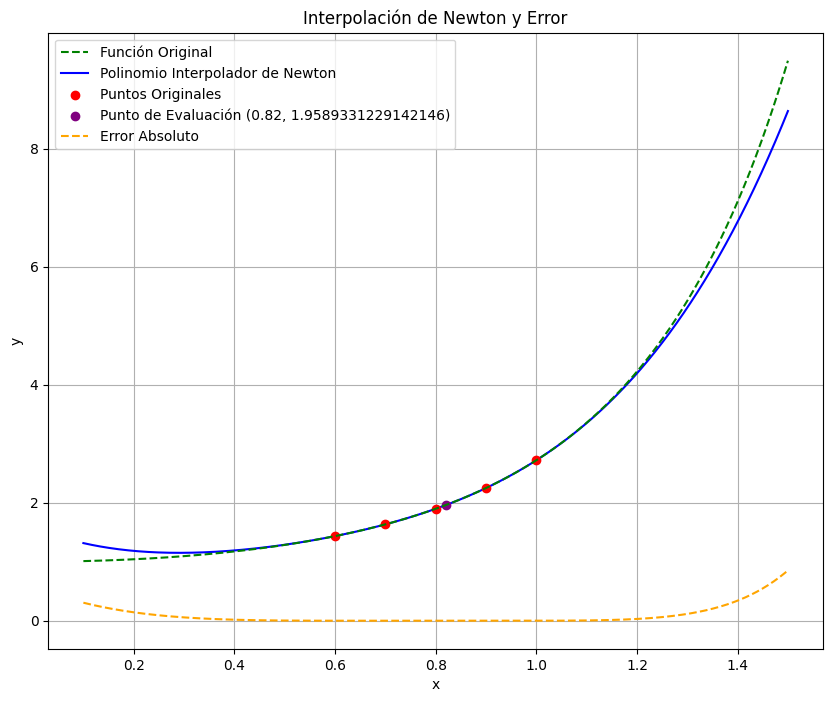

In [33]:
# Ejemplo de uso
x = [0.6, 0.7, 0.8, 0.9, 1.0]

# Función que genera los valores de y
def func(x):
    return np.exp(x**2)

# Punto a evaluar
x_eval = 0.82
y_real = func(x_eval)

# Llamamos a la función con el cálculo del error y la gráfica
plot_newton_interpolation(x, func, x_eval, y_real)

In [23]:

import numpy as np
from sympy import *
import matplotlib.pyplot as plt

# Función para calcular las diferencias divididas de Newton
def newton_diferencias_divididas(x, y):
    n = len(x)
    coef = np.zeros([n, n])
    coef[:, 0] = y  # La primera columna son los valores de y

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])

    return coef[0, :]

# Función para construir el polinomio de Newton
def newton_interpolacion(x, y, u=None):
    n = len(x)
    t = Symbol('t')
    coef = newton_diferencias_divididas(x, y)

    p = coef[0]
    for i in range(1, n):
        term = coef[i]
        for j in range(i):
            term *= (t - x[j])
        p += term

    p = expand(p)

    if u == None:
        return p
    else:
        r = p.subs(t, u)
        return r

# Función para calcular el máximo de la derivada (n+1)-ésima en el intervalo
def max_derivada(func, x, n):
    t = Symbol('t')
    derivada_n = diff(func, t, n + 1)  # Derivada de orden (n+1)
    derivada_func = lambdify(t, derivada_n, 'numpy')

    # Evaluamos la derivada en varios puntos del intervalo
    x_vals = np.linspace(min(x), max(x), 100)
    derivada_vals = np.abs(derivada_func(x_vals))
    max_val = np.max(derivada_vals)

    return max_val

# Función para calcular el error con la fórmula del Corolario 1
def calcular_error_cota(x, x_eval, n, max_derivada_n):
    producto = 1
    for xi in x:
        producto *= (x_eval - xi)

    error_cota = abs(producto) * max_derivada_n / factorial(n + 1)
    return error_cota

# Función para graficar e interpolar usando diferencias divididas de Newton
def plot_newton_interpolation(x, func, x_eval, y_real):
    # Calcula los valores de y usando la función dada
    y = [func(xi) for xi in x]

    # Construir el polinomio de Newton
    p = newton_interpolacion(x, y)

    # Evaluar el polinomio en el punto x_eval
    y_eval = newton_interpolacion(x, y, x_eval)

    # Convertimos el polinomio en una función que pueda evaluar un conjunto de valores
    p_func = lambdify(Symbol('t'), p, modules=['numpy'])

    # Calcular el error absoluto
    error_abs = abs(y_real - y_eval)

    # Calcular la cota del error utilizando el Corolario 1
    max_deriv = max_derivada(func, x, len(x) - 1)  # (n+1)-ésima derivada
    error_cota = calcular_error_cota(x, x_eval, len(x) - 1, max_deriv)

    # Imprimir el polinomio interpolador, el valor interpolado y el error
    print(f"El polinomio interpolador es: {p}")
    print(f"Valor interpolado en x = {x_eval}: {y_eval}")
    print(f"Error absoluto en el punto ({x_eval}, {y_real}): {error_abs}")
    print(f"Cota del error en el punto ({x_eval}): {error_cota}")

    # Creamos un conjunto de valores para x y poder graficar
    x_vals = np.linspace(min(x) - 0.1, max(x) + 0.1, 500)
    # Evaluamos la función en el conjunto de valores
    y_vals = p_func(x_vals)

    # Evaluamos la función original en el conjunto de valores
    y_func_vals = [func(xi) for xi in x_vals]

    # Evaluamos el error en el conjunto de valores
    error_vals = np.abs(np.array(y_func_vals) - np.array(y_vals))

    # Creamos la figura
    plt.figure(figsize=(10, 8))

    # Graficamos la función original
    plt.plot(x_vals, y_func_vals, label='Función Original', color='green', zorder = 10, linestyle='--')

    # Graficamos la interpolación de Newton
    plt.plot(x_vals, y_vals, label='Polinomio Interpolador de Newton', color='blue')

    # Graficamos los puntos originales
    plt.scatter(x, y, color='red', zorder=5, label='Puntos Originales')

    # Marcamos el punto de evaluación
    plt.scatter([x_eval], [y_real], color='purple', zorder=6, label=f'Punto de Evaluación ({x_eval}, {y_real})')

    # Graficamos el error absoluto
    plt.plot(x_vals, error_vals, label='Error Absoluto', color='orange', linestyle='--')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Interpolación de Newton y Error')
    plt.grid()
    plt.legend()
    plt.show()



In [24]:
# Ejemplo de uso
x = [0.6, 0.7, 0.8, 0.9, 1.0]

# Definir la función original usando def
def func(x):
    return np.exp(x**2)  # Función original

x_eval = 0.82  # Punto de evaluación
y_real = func(x_eval)  # Valor real en el punto de evaluación

plot_newton_interpolation(x, func, x_eval, y_real)

SympifyError: SympifyError: "cannot sympify object of type <class 'function'>"

In [28]:
#CODIGO CON FORMULA DE ERROR

import numpy as np
from sympy import *
import matplotlib.pyplot as plt

# Definimos una variable simbólica global
t = Symbol('t')

# Función para calcular las diferencias divididas de Newton
def newton_diferencias_divididas(x, y):
    n = len(x)
    coef = np.zeros([n, n])
    coef[:, 0] = y  # La primera columna son los valores de y

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])

    return coef[0, :]

# Función para construir el polinomio de Newton
def newton_interpolacion(x, y, u=None):
    n = len(x)
    coef = newton_diferencias_divididas(x, y)

    p = coef[0]
    for i in range(1, n):
        term = coef[i]
        for j in range(i):
            term *= (t - x[j])
        p += term

    p = expand(p)

    if u is None:
        return p
    else:
        r = p.subs(t, u)
        return r

# Función para calcular el máximo de la derivada (n+1)-ésima en el intervalo
def max_derivada(func_symbolic, x, n):
    derivada_n = diff(func_symbolic, t, n + 1)  # Derivada de orden (n+1)
    derivada_func = lambdify(t, derivada_n, 'numpy')

    # Evaluamos la derivada en varios puntos del intervalo
    x_vals = np.linspace(min(x), max(x), 100)
    derivada_vals = np.abs(derivada_func(x_vals))
    max_val = np.max(derivada_vals)

    return max_val

# Función para calcular el error con la fórmula del Corolario 1
def calcular_error_cota(x, x_eval, n, max_derivada_n):
    producto = 1
    for xi in x:
        producto *= (x_eval - xi)

    error_cota = abs(producto) * max_derivada_n / factorial(n + 1)
    return error_cota

# Función para graficar e interpolar usando diferencias divididas de Newton
def plot_newton_interpolation(x, func, func_symbolic, x_eval, y_real):
    # Calcula los valores de y usando la función dada
    y = [func(xi) for xi in x]

    # Construir el polinomio de Newton
    p = newton_interpolacion(x, y)

    # Evaluar el polinomio en el punto x_eval
    y_eval = newton_interpolacion(x, y, x_eval)

    # Convertimos el polinomio en una función que pueda evaluar un conjunto de valores
    p_func = lambdify(t, p, modules=['numpy'])

    # Calcular el error absoluto
    error_abs = abs(y_real - y_eval)

    # Calcular la cota del error utilizando el Corolario 1
    max_deriv = max_derivada(func_symbolic, x, len(x) - 1)  # (n+1)-ésima derivada
    error_cota = calcular_error_cota(x, x_eval, len(x) - 1, max_deriv)

    # Imprimir el polinomio interpolador, el valor interpolado y el error
    print(f"El polinomio interpolador es: {p}")
    print(f"Valor interpolado en x = {x_eval}: {y_eval}")
    print(f"Error absoluto en el punto ({x_eval}, {y_real}): {error_abs}")
    print(f"Cota del error en el punto ({x_eval}): {error_cota}")

    # Creamos un conjunto de valores para x y poder graficar
    x_vals = np.linspace(min(x) - 0.5, max(x) + 0.5, 500)
    # Evaluamos la función en el conjunto de valores
    y_vals = p_func(x_vals)

    # Evaluamos la función original en el conjunto de valores
    y_func_vals = [func(xi) for xi in x_vals]

    # Evaluamos el error en el conjunto de valores
    error_vals = np.abs(np.array(y_func_vals) - np.array(y_vals))

    # Creamos la figura
    plt.figure(figsize=(10, 8))

    # Graficamos la función original
    plt.plot(x_vals, y_func_vals, label='Función Original', color='green', zorder=10, linestyle='--')

    # Graficamos la interpolación de Newton
    plt.plot(x_vals, y_vals, label='Polinomio Interpolador de Newton', color='blue')

    # Graficamos los puntos originales
    plt.scatter(x, y, color='red', zorder=5, label='Puntos Originales')

    # Marcamos el punto de evaluación
    plt.scatter([x_eval], [y_real], color='purple', zorder=6, label=f'Punto de Evaluación ({x_eval}, {y_real})')

    # Graficamos el error absoluto
    plt.plot(x_vals, error_vals, label='Error Absoluto', color='orange', linestyle='--')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Interpolación de Newton y Error')
    plt.grid()
    plt.legend()
    plt.show()




El polinomio interpolador es: 3.99987180070498*t**4 - 8.31884972421265*t**3 + 8.92885530649355*t**2 - 3.47256303452017*t + 1.58096747999333
Valor interpolado en x = 0.82: 1.95890964334248
Error absoluto en el punto (0.82, 1.9589331229142146): 0.0000234795717355407
Cota del error en el punto (0.82): 0.0000537358650351633


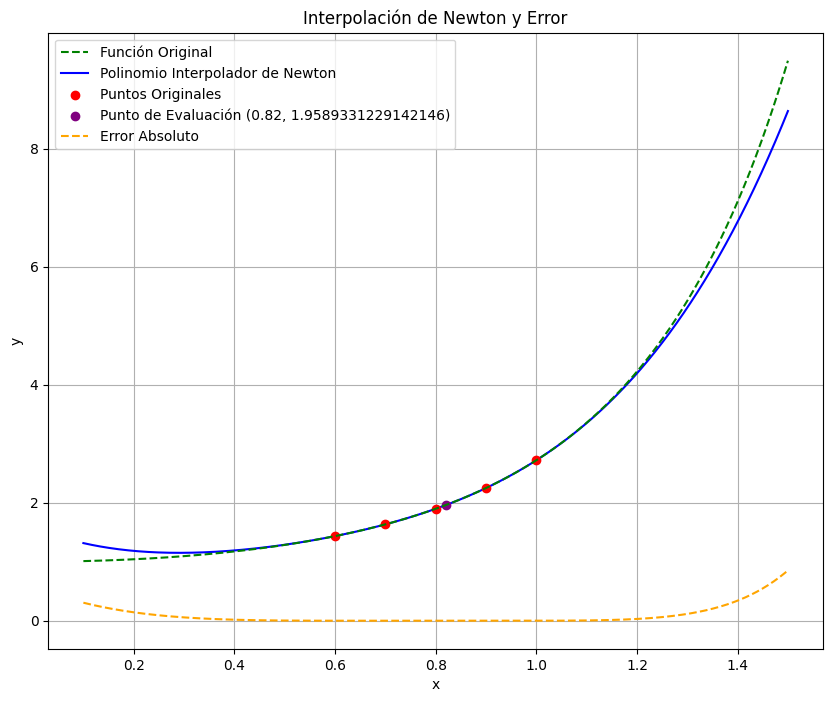

In [29]:
# Ejemplo de uso
x = [0.6, 0.7, 0.8, 0.9, 1.0]

# Definir la función original usando def
def func(x):
    return np.exp(x**2)  # Función original

# Definimos la función simbólica para SymPy
func_symbolic = exp(t**2)

x_eval = 0.82  # Punto de evaluación
y_real = func(x_eval)  # Valor real en el punto de evaluación

plot_newton_interpolation(x, func, func_symbolic, x_eval, y_real)